<a href="https://colab.research.google.com/github/RaulFloresR/Estadistica-Aplicada-RFR-1838148/blob/main/PIA_Estad%C3%ADsticaAplicada_los3fant%C3%A1sticos_may2023_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PIA de Estadística Aplicada**
## Series de tiempo: IGAE

###**Equipo Los 3 fantásticos**

###Integrantes:
### Irlanda Monserrat López Garza #1910640
### Raúl Flores Robles #1838148
### Cinthya Yesenia López Diaz #1658003
###Grupo 042

**Serie de tiempo del Indicador Global de la Actividad Económica de México (IGAE)**

Es un indicador que muestra la evolución de la actividad económica del país, con periocidad mensual.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Importamos las series de timepo
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.stattools import adfuller

#Modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import seasonal_decompose 

In [ ]:
## los datos mensuales de igae 
datos_igae = pd.read_excel('igae_mexico.xls')


In [ ]:
datos_igae

,Periodos,IGAE
0,1993/01,60.407691
1,1993/02,61.022521
2,1993/03,63.943249
3,1993/04,61.865984
4,1993/05,63.612900
...,...,...
357,2022/10,113.121303
358,2022/11,116.340606
359,2022/12,115.577072
360,2023/01,112.093943


In [ ]:
datos_igae['Periodos'] = pd.to_datetime(datos_igae['Periodos'], format = '%Y/%m')

In [ ]:
datos_igae = datos_igae.set_index('Periodos')

In [ ]:
datos_igae.index.freq = 'MS'

In [ ]:
datos_igae

,IGAE
Periodos,
1993-01-01,60.407691
1993-02-01,61.022521
1993-03-01,63.943249
1993-04-01,61.865984
1993-05-01,63.612900
...,...
2022-10-01,113.121303
2022-11-01,116.340606
2022-12-01,115.577072


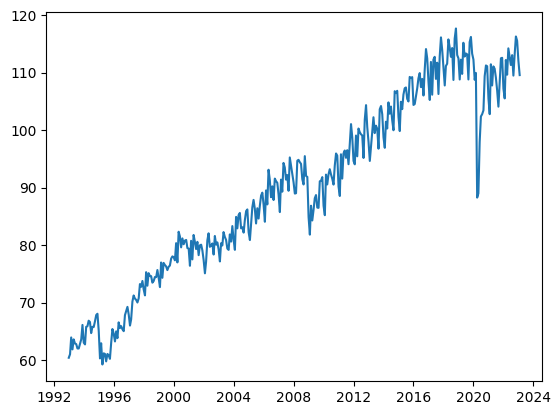

In [ ]:
plt.plot(datos_igae);

Como se puede observar en la gráfica, está serie de tiempo tiene una tendencia creciente.

Se observa cierta estacionalidad, ya que en los últimos meses del año se observa un incremento en IGAE, mientras que en los primeros meses como febrero disminuye este indicador. En el año 2020 se puede observar que en los meses de abril - junio hay una disminución en el IGAE, esto posiblemente se debe al inicio de la pandemia en el país y como consecuencia hubo un paro en el crecimiento económico de México.

El análisis de las series de tiempo tiene como propósito anticipar valores futuros de una determinada variable, esto quiere decir que es de mucha importancia para el país porque les ayuda a predecir la evolución de la economía en México, y así tomar medidas estratégicas para un mayor rendimiento, además de tener en cuenta los métodos ya empleados que obtuvieron buenos resultados al país para seguir empleando.

In [ ]:
datos_igae.describe()

,IGAE
count,362.000000
mean,89.730118
std,16.074682
min,59.239087
25%,77.735106
50%,89.507630
75%,104.410715
max,117.729597


In [ ]:
#creamos un duplicado de los datos 
datos_igae2=datos_igae.copy()

## recesiones es un 1, así que multiplicamos para que las areas gris lleguen cubra los limites del eje Y
datos_igae2['IGAE']=datos_igae2['IGAE']


In [ ]:
datos_igae2['MA-3'] = datos_igae2['IGAE'].rolling(window=3).mean()
datos_igae2['MA-6'] = datos_igae2['IGAE'].rolling(window=6).mean()

In [ ]:
datos_igae2

,IGAE,MA-3,MA-6
Periodos,,,
1993-01-01,60.407691,NaN,NaN
1993-02-01,61.022521,NaN,NaN
1993-03-01,63.943249,61.791154,NaN
1993-04-01,61.865984,62.277251,NaN
1993-05-01,63.612900,63.140711,NaN
...,...,...,...
2022-10-01,113.121303,111.912612,112.354997
2022-11-01,116.340606,112.997081,112.700331
2022-12-01,115.577072,115.012993,113.170954


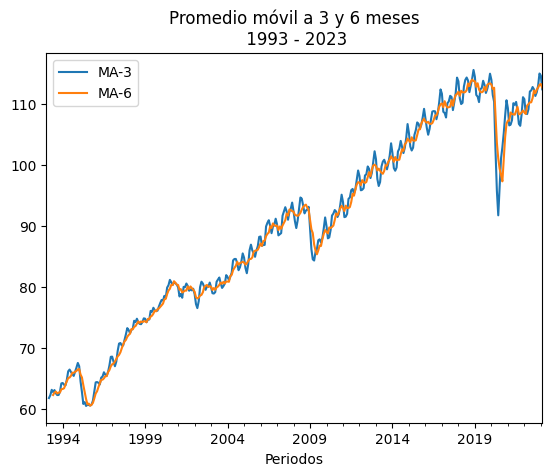

In [ ]:
datos_igae2[['MA-3','MA-6']].plot()
plt.title('Promedio móvil a 3 y 6 meses\n 1993 - 2023');

**Con el promedio móvil podemos identificar la dirección de una tendencia, en este caso, nos indica que su tendencia es alcista**

In [ ]:
datos_igae2['MA-3 > MA-6'] = datos_igae2['MA-3'] > datos_igae2['MA-6']
datos_igae2.head()

,IGAE,MA-3,MA-6,MA-3 > MA-6
Periodos,,,,
1993-01-01,60.407691,NaN,NaN,False
1993-02-01,61.022521,NaN,NaN,False
1993-03-01,63.943249,61.791154,NaN,False
1993-04-01,61.865984,62.277251,NaN,False
1993-05-01,63.612900,63.140711,NaN,False


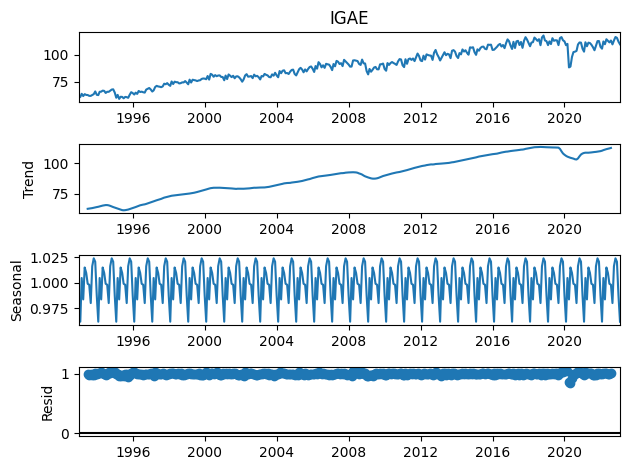

In [ ]:
results = seasonal_decompose(datos_igae2['IGAE'], model='mul')
results.plot();

**En esta gráfica nos muestra que los datos mantienen una tendencia positiva y también nos indica que la serie ya es estaciónaria.**

In [ ]:
results.seasonal

Periodos
1993-01-01    0.987470
1993-02-01    0.961645
1993-03-01    1.004665
1993-04-01    0.983582
1993-05-01    1.015014
                ...   
2022-10-01    1.016276
2022-11-01    1.024048
2022-12-01    1.020661
2023-01-01    0.987470
2023-02-01    0.961645
Freq: MS, Name: seasonal, Length: 362, dtype: float64

In [ ]:
datos_igae2['serie desestacionalizada'] = datos_igae2['IGAE']/results.seasonal

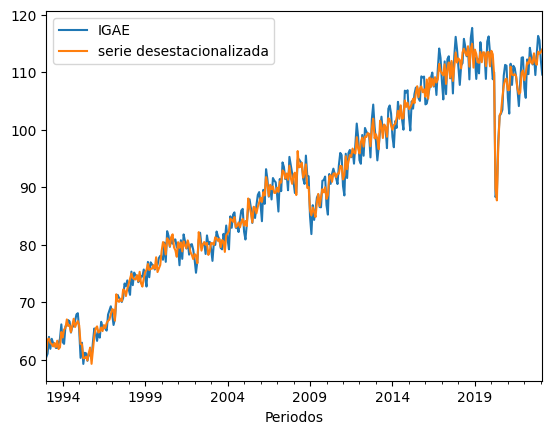

In [ ]:
datos_igae2[['IGAE','serie desestacionalizada']].plot();

**La serie desestacionalizada nos permite contrastar el comportamiento de las series eliminando las fluctuaciones de corto plazo, es ideal eliminar el componente estacional de la serie sin la inclusión de efectos estacionales.**

In [ ]:
#Visualizamos los primeros datos
datos_igae2.head()

,IGAE,MA-3,MA-6,MA-3 > MA-6,serie desestacionalizada
Periodos,,,,,
1993-01-01,60.407691,NaN,NaN,False,61.174204
1993-02-01,61.022521,NaN,NaN,False,63.456380
1993-03-01,63.943249,61.791154,NaN,False,63.646349
1993-04-01,61.865984,62.277251,NaN,False,62.898641
1993-05-01,63.612900,63.140711,NaN,False,62.671932


In [ ]:
# Verificar serie estacionaria 
from statsmodels.tsa.stattools import adfuller
# prueba de dickey-fuller
ADF_test1 = adfuller(datos_igae2['IGAE'])
#Ho: Serie No estacionaria

#significancia 5%
alpha =0.05

if ADF_test1[1] < alpha:
    print('rechazamos Ho, La serie ES estacionaria')
else:
    print('No rechazamos Ho, La serie es NO estacionaria')

No rechazamos Ho, La serie es NO estacionaria


 **Como sabemos esta proceso es NO estacionario, asi que aplicaremos las primeras diferencias.**

In [ ]:
datos_igae2['IGAE_diff'] = datos_igae2['IGAE'].diff()

In [ ]:
datos_igae2.head()

,IGAE,MA-3,MA-6,MA-3 > MA-6,serie desestacionalizada,IGAE_diff
Periodos,,,,,,
1993-01-01,60.407691,NaN,NaN,False,61.174204,NaN
1993-02-01,61.022521,NaN,NaN,False,63.456380,0.614830
1993-03-01,63.943249,61.791154,NaN,False,63.646349,2.920728
1993-04-01,61.865984,62.277251,NaN,False,62.898641,-2.077265
1993-05-01,63.612900,63.140711,NaN,False,62.671932,1.746916


**Se utilizó la raiz unitaria para que con las diferencias del IGAE se convierta en un proceso estacionario**

Text(0.5, 1.0, 'Las Primeras diferencias durante el Trimestre ')

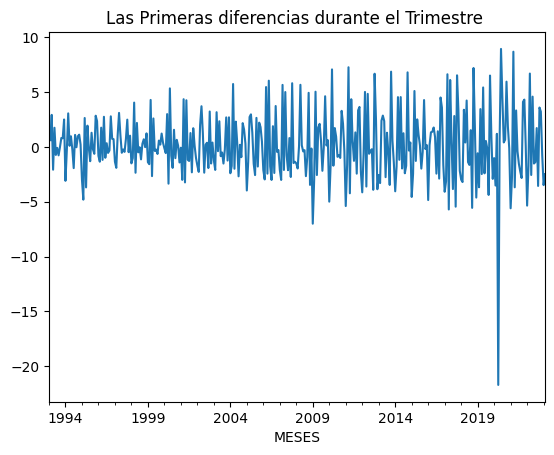

In [ ]:
datos_igae2['IGAE_diff'].plot()
plt.xlabel('MESES')
plt.title('Las Primeras diferencias durante el Trimestre ')

In [ ]:
# Verificar serie estacionaria 
from statsmodels.tsa.stattools import adfuller
# prueba de dickey-fuller
ADF_test2 = adfuller(datos_igae2['IGAE_diff'].dropna())
#Ho: Serie No estacionaria

#significancia 5%
alpha =0.05

if ADF_test2[1] < alpha:
    print('rechazamos Ho, La serie ES estacionaria')
else:
    print('No rechazamos Ho, La serie es NO estacionaria')

rechazamos Ho, La serie ES estacionaria


**Como ahora nuestro proceso es estacionario, se realizará las gráficas de autocorrelación y autocorrelación parcial**

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


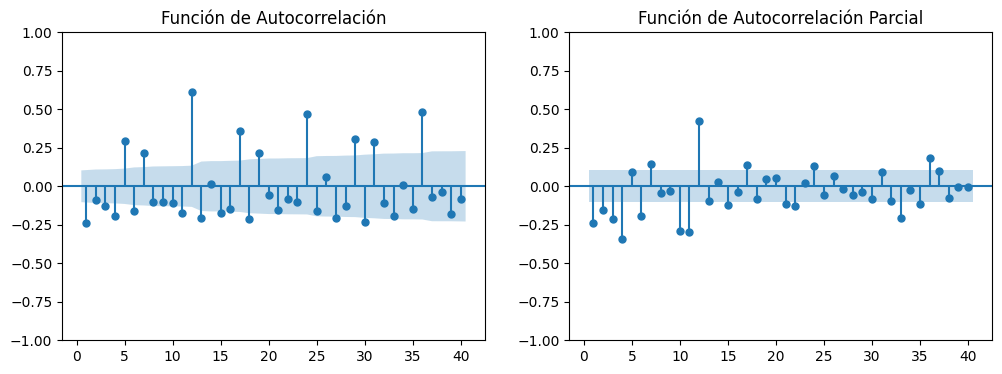

In [ ]:
ig, ax = plt.subplots(1,2,figsize=(12,4))

plot_acf(datos_igae2['IGAE_diff'].dropna(), zero=False, lags=40, ax=ax[0],title="Función de Autocorrelación")
ax[0].set_ylim(-1,1)
plot_pacf(datos_igae2['IGAE_diff'].dropna(), zero=False, lags=40, ax=ax[1], title="Función de Autocorrelación Parcial")
ax[1].set_ylim(-1,1)
plt.show();

**Las funciones de autocorrelación nos muestra que las variables son dependientes una de la otra. Con la anterior grafica, podemos denotar que las graficas es para las variables autoregresivas y medias móviles. La serie ya es estaciónaria por lo cuál bajo el supuesto de la prueba de raíz unitaria, podemos calcular el modelo.**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults

#Vamos a estimar varios modelos y que se guarde el AIC BIC
ic = {}
for ar in range(6):
  for ma in range(6):
    print(f"AR: {ar}, MA: {ma}")
    modelo = ARIMA(datos_igae2['IGAE'].dropna(), order=(ar, 1, ma))
    resultado = modelo.fit()
    ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 2, MA: 0
AR: 2, MA: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4
AR: 2, MA: 5
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4
AR: 3, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Ordenamos los valores obtenidos para saber que modelo utilizar.**


In [ ]:
ic.sort_values('AIC', ascending = True).head(5)

AIC          BIC
AR MA                          
4  5   1667.979168  1706.867947
   4   1672.015044  1707.014946
5  5   1674.325264  1717.102922
   4   1684.452092  1723.340871
4  3   1685.289032  1716.400056

In [ ]:
ic.sort_values('BIC', ascending = True).head(5)

AIC          BIC
AR MA                          
4  5   1667.979168  1706.867947
   4   1672.015044  1707.014946
   3   1685.289032  1716.400056
5  5   1674.325264  1717.102922
   3   1685.721963  1720.721865

**El mejor modelo que podemos utilizar es el ARIMA (4,1,5) con respecto al criterio de AIC como BIC, aunque ambos criterios mostraron el mismo resultado para los primeros modelos (con un modelo (4,1,5) y (5,1,4) ), se puede observar una diferencia a partir de ahi.**

In [ ]:
# Calculamos el modelo escogido de (4,1,5)

modelo = ARIMA(datos_igae2['IGAE'].dropna(), order = (4,1,5))
resultado = modelo.fit()
print(resultado.summary());

                               SARIMAX Results                                
Dep. Variable:                   IGAE   No. Observations:                  362
Model:                 ARIMA(4, 1, 5)   Log Likelihood                -823.990
Date:                Wed, 17 May 2023   AIC                           1667.979
Time:                        06:58:45   BIC                           1706.868
Sample:                    01-01-1993   HQIC                          1683.440
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7093      0.025    -28.542      0.000      -0.758      -0.661
ar.L2         -0.2531      0.012    -21.155      0.000      -0.277      -0.230
ar.L3         -0.7422      0.012    -62.601      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# pronosticamos los siguientes 5 periodos

resultado.predict('2023-03-01','2023-07-01')

2023-03-01    111.910711
2023-04-01    111.379824
2023-05-01    114.727158
2023-06-01    113.656408
2023-07-01    111.850676
Freq: MS, Name: predicted_mean, dtype: float64

**De acuerdo a los pronósticos, los valores del IGAE para los meses de marzo, abril, mayo, junio y julio de 2023 son de 111.910711, 111.379824, 114.727158, 113.656408 y 111.850676, respectivamente.**